##  <font color='black'>Hospital versus ICU Admission Status (Impact on likihood of death)
    

In [12]:
# Import dependencies

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [13]:
# Read Data file
df = pd.read_csv('./Data/clean_data.csv')

In [14]:
# Display header to get a sense of look and feel
df.head(2)

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,month,inpatient__occupancy,percent_of_inpatients_with_covid
0,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,0.0,11,0.688734,0.1512
1,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,0.0,11,0.688734,0.1512


In [15]:
#Define Month Grouping
grp_stats = df.groupby(['month'])

grp_stats.count().head(2)

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,inpatient__occupancy,percent_of_inpatients_with_covid
month,,,,,,,,,,,,,
1,16,16,16,16,16,16,16,16,16,16,16,16,16
2,70,70,70,70,70,70,70,70,70,70,70,70,70


In [16]:
#Calculate Death & Covid inpatients Stats per month

# Sum on Death 
sum_dth = grp_stats["death_yn"].sum()

# Total Population Count
totalcnt = grp_stats["death_yn"].count()

#Average Percent of deaths
pct_dth = sum_dth/totalcnt

#Average Covid inpatient percentage
covid_inpatient_pct = grp_stats["percent_of_inpatients_with_covid"].mean()


In [17]:
#Create a dataframe to enable statistical regression and plotting
grp_stats_df = pd.DataFrame({"In Patient Pct" : covid_inpatient_pct,
                             "Dth_Rate" : pct_dth
                             })
grp_stats_df

,In Patient Pct,Dth_Rate
month,,
1,0.000000,0.000000
2,0.004861,0.228571
3,0.067229,0.260440
4,0.148326,0.171560
5,0.111960,0.094997
6,0.078412,0.168010
7,0.105063,0.039583
8,0.087548,0.032629
9,0.068433,0.026141


In [21]:
#Set today's date as a variable
date = pd.to_datetime("today").strftime("%m/%d/%Y")

In [22]:
#Calculate correlation coefficient
Correlation_Coef = round(st.pearsonr(grp_stats_df['In Patient Pct'],grp_stats_df['Dth_Rate'])[0],5)
Correlation_Coef

-0.14409

In [23]:
#Calulate linear formula
x_values = grp_stats_df['In Patient Pct']
y_values = grp_stats_df['Dth_Rate']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#Record results in a dataframe
linear_formula_Df = pd.DataFrame({
    "Corr Analysis":"In Patient Pct vs Dth_Rate",
    "Slope":{slope},
    "Intercept":{intercept},
    "rValueCorr_Coef":{rvalue},
    "PndasCorr_Coef":{Correlation_Coef},
    "StdErr":{stderr} 
} ,index=[0] )
linear_formula_Df

,Corr Analysis,Slope,Intercept,rValueCorr_Coef,PndasCorr_Coef,StdErr
0,In Patient Pct vs Dth_Rate,{-0.2783070945915395},{0.11940860702490949},{-0.14409079864421032},{-0.14409},{0.6371047870586242}


In [24]:
#Create text for plot overlay
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_equation

'y = -0.28x + 0.12'

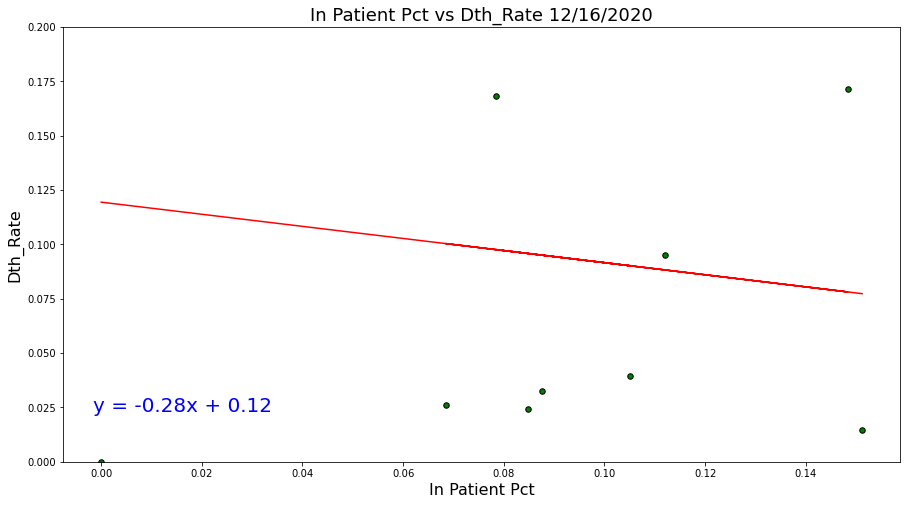

In [51]:
#Plot the linear regression model on top of the scatter plot

# Generate a scatter plot of Max Temp vs. Latitude
# Add the linear regreassion and line to the plot

#Charactorize figure size/layout                       
fig1, ax1 = plt.subplots(figsize=(15, 8))

#Build and format scatter plot based on mean values drawn from the clean_weather_data_df dataframe
plt.scatter(grp_stats_df['In Patient Pct'],grp_stats_df['Dth_Rate'],s=30, edgecolors='black', color="green")

#define title and Lable axis
plt.title('In Patient Pct vs Dth_Rate '+date,fontsize =18)
plt.xlabel('In Patient Pct',fontsize =16)
plt.ylabel('Dth_Rate',fontsize =16)
marker_size = 12

#Establish plot limits
plt.ylim(0, .2)

# Add plot and text of linear regression model 
plt.plot(x_values,regress_values,"r-")
ax1.annotate(line_equation, xy=(.08, .12), xycoords='data',xytext=(0.25, 0.15), textcoords='axes fraction',
             horizontalalignment='right', verticalalignment='top',fontsize=20,color="blue")


#Save image for potential reference in the report
plt.savefig("./Images/Plots/In Patient Pct vs Dth_Rate.png")

plt.show()

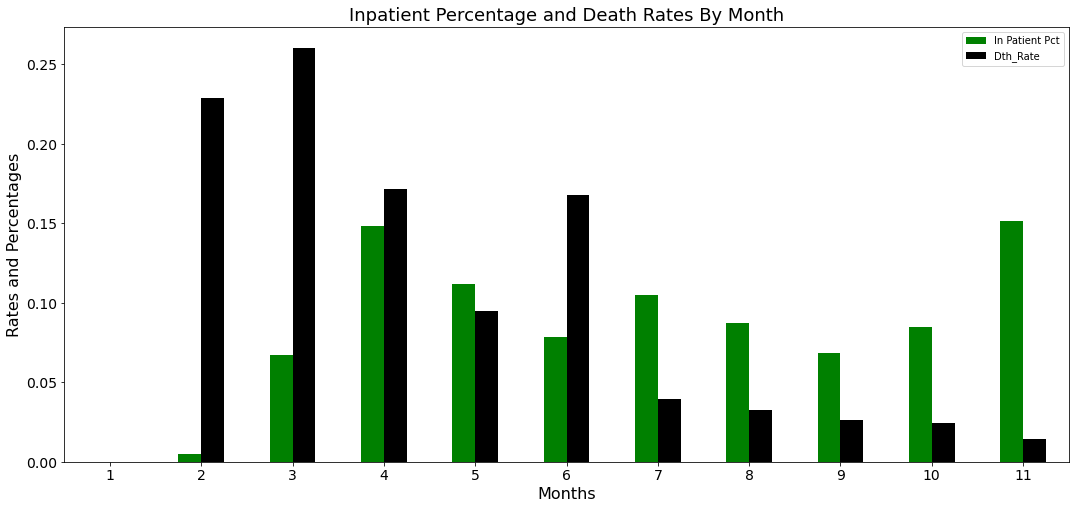

In [50]:
# Generate a bar plot showing the inpatient percentage and death rates by month using pandas.

#Plot Chart
measure_plot = grp_stats_df.plot.bar(figsize=(18,8), color= ['green', 'black'],fontsize = 14)
plt.xlabel("Months",fontsize = 16)
plt.ylabel("Rates and Percentages",fontsize = 16)
plt.title("Inpatient Percentage and Death Rates By Month",fontsize = 18)
plt.xticks(rotation=0)


#Save image for potential reference in the report
plt.savefig("./Images/Plots/inpatient_pct_and_dth_rte_plot_by_mnth.png")

plt.show()